1- Libraries

In [44]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

2- Geting the data and creating training and test arrays

In [45]:
# geting the data
mnist = tf.keras.datasets.mnist

In [46]:
# creating trinig and test arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [47]:
# shape and type

print ("trining data shape : ", X_train.shape)
print ("training data type : ", type(X_train))
print ("test data shape : ", X_test.shape)
print ("test data type : ", type(X_test))


trining data shape :  (60000, 28, 28)
training data type :  <class 'numpy.ndarray'>
test data shape :  (10000, 28, 28)
test data type :  <class 'numpy.ndarray'>


3- Visualize our data

In [48]:
# function takes the index of the image and return the image

def display_image (i):
    image = i
    image = np.array(image, dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap= 'binary')
    plt.show()

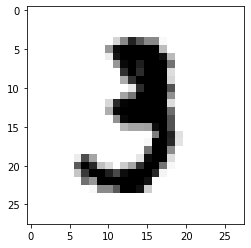

In [49]:
# display the image with index 10

display_image(X_train[10])

In [50]:
X_train[10].shape

(28, 28)

4- Preprocessing

In [51]:
# split the image into blocks (small images)

def split_image (img, row, col):
    x, y = img.shape        # (28, 28)
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)

    return (img.reshape (x // row, row, -1, col).swapaxes(1,2).reshape(-1,row,col))

In [52]:
# test the function

#print the shape
print (split_image(X_test[2], 7 , 7).shape) 

# print the arrays
split_image(X_test[2], 7 , 7)

(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  38, 254, 109,   0,   0],
        [  0,   0,  87, 252,  82,   0,   0],
        [  0,   0, 135, 241,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

5- Feature Extraction (Get the centroid)

In [53]:
# centoid = (X, Y)
# X = Xc / sum
# Y = Yc / sum

# function takes an image and return a FV ((7*7)*1)

def get_centroid(img):
    FV = []
    for grid in split_image(img, 7, 7):
        Xc = 0
        Yc = 0
        sum = 0

        for index, x in np.ndenumerate(grid):
            sum += x
            Xc += x * index[0]
            Yc += x * index [1]
        if sum != 0 :   
            FV.append(Xc / sum)
            FV.append(Yc / sum)
        else :
            FV.append(0)
            FV.append(0)
    return np.array(FV)


6- Test , Train Features


In [54]:
# get centroid for training data (images)
train_features = [get_centroid(img)  for img in X_train  ]

In [55]:
# to numpy array
train_features = np.array(train_features)

train_features.shape
train_features[:2]

array([[0.        , 0.        , 5.97229551, 4.6055409 , 5.71422432,
        3.13708638, 5.44336283, 0.72920354, 0.        , 0.        ,
        1.92178018, 4.10367498, 1.58336198, 1.75730492, 0.        ,
        0.41052632, 0.        , 0.        , 5.23522727, 5.36363636,
        3.24870541, 2.6051496 , 0.        , 0.        , 2.5606469 ,
        5.27493261, 1.3818144 , 2.84789846, 0.14285714, 0.60192616,
        0.        , 0.        ],
       [0.        , 0.        , 6.        , 6.        , 5.24278291,
        2.80398383, 6.        , 0.        , 0.        , 0.        ,
        3.27941463, 3.83317073, 1.65757906, 3.3998546 , 3.86559922,
        0.29354682, 3.54780876, 6.        , 3.16214896, 1.04420024,
        3.85209254, 3.71952171, 0.90250447, 0.31842576, 0.24778761,
        6.        , 0.86265329, 3.02831661, 0.20055325, 0.63070539,
        0.        , 0.        ]])

In [56]:
# get centroid for test data (images)
test_features = [get_centroid(img)  for img in X_test  ]

In [57]:
# to numpy array
test_features = np.array(test_features)

test_features.shape
test_features[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.95442359, 6.        ,
        1.21994302, 2.92022792, 2.86991727, 3.67136068, 2.28481013,
        0.        , 0.        , 0.        , 5.91555556, 5.98666667,
        2.97017501, 2.05669214, 0.        , 0.        , 0.        ,
        0.        , 2.86841394, 4.92785734, 0.90693739, 0.1319797 ,
        0.        , 0.        ],
       [0.        , 0.        , 4.56700508, 3.56903553, 4.56971064,
        1.26719278, 0.        , 0.        , 0.        , 0.        ,
        3.72274798, 4.43778479, 1.95129284, 0.9305472 , 0.        ,
        0.        , 0.        , 0.        , 3.31512801, 3.18355314,
        5.9430019 , 2.99873338, 5.68307087, 2.30462598, 0.        ,
        0.        , 0.31214149, 3.79636711, 0.4046496 , 2.65026954,
        0.        , 1.77044025]])

7- Classifiacation model (KNN)

In [58]:
# function returns the prediction

def KNN(train_features, test_features, y_train):
    
    knn = KNeighborsClassifier(10, metric='euclidean')
    knn.fit(train_features, y_train) 
    prediction = knn.predict(test_features)  
    return prediction

In [59]:
Knn_prediction = KNN(train_features, test_features , y_train )

8- Evaluating the model

In [60]:
print("Accuracy Score =", accuracy_score(y_test, Knn_prediction) * 100, "%")

Accuracy Score = 90.79 %
